<a href="https://colab.research.google.com/github/BilalKhaliqWillis/BILAL-Assignment2/blob/main/Final_Project_Introduction_to_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Heart Disease Prediction AI Application
"""HeartDiseasePredictionFinalProject.ipynb
# Heart Disease Prediction AI Application

## 1. Problem Definition and Dataset Selection

### Problem Statement
Heart disease is the leading cause of death worldwide. Early detection and prediction of heart disease can improve patient outcomes and reduce healthcare costs.

### Dataset
Will be utilizing the **Cleveland Heart Disease Dataset** from the UCI Machine Learning Repository. It contains clinical information about patients and whether they have heart disease.

### Importing Required Libraries
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

print("All libraries imported successfully!")

All libraries imported successfully!


Dataset loaded successfully!
Dataset shape: (303, 14)

First 5 rows of the dataset:
Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB
None

Dataset Description:
              age         sex          cp    trestbps        chol         fbs  \
count 

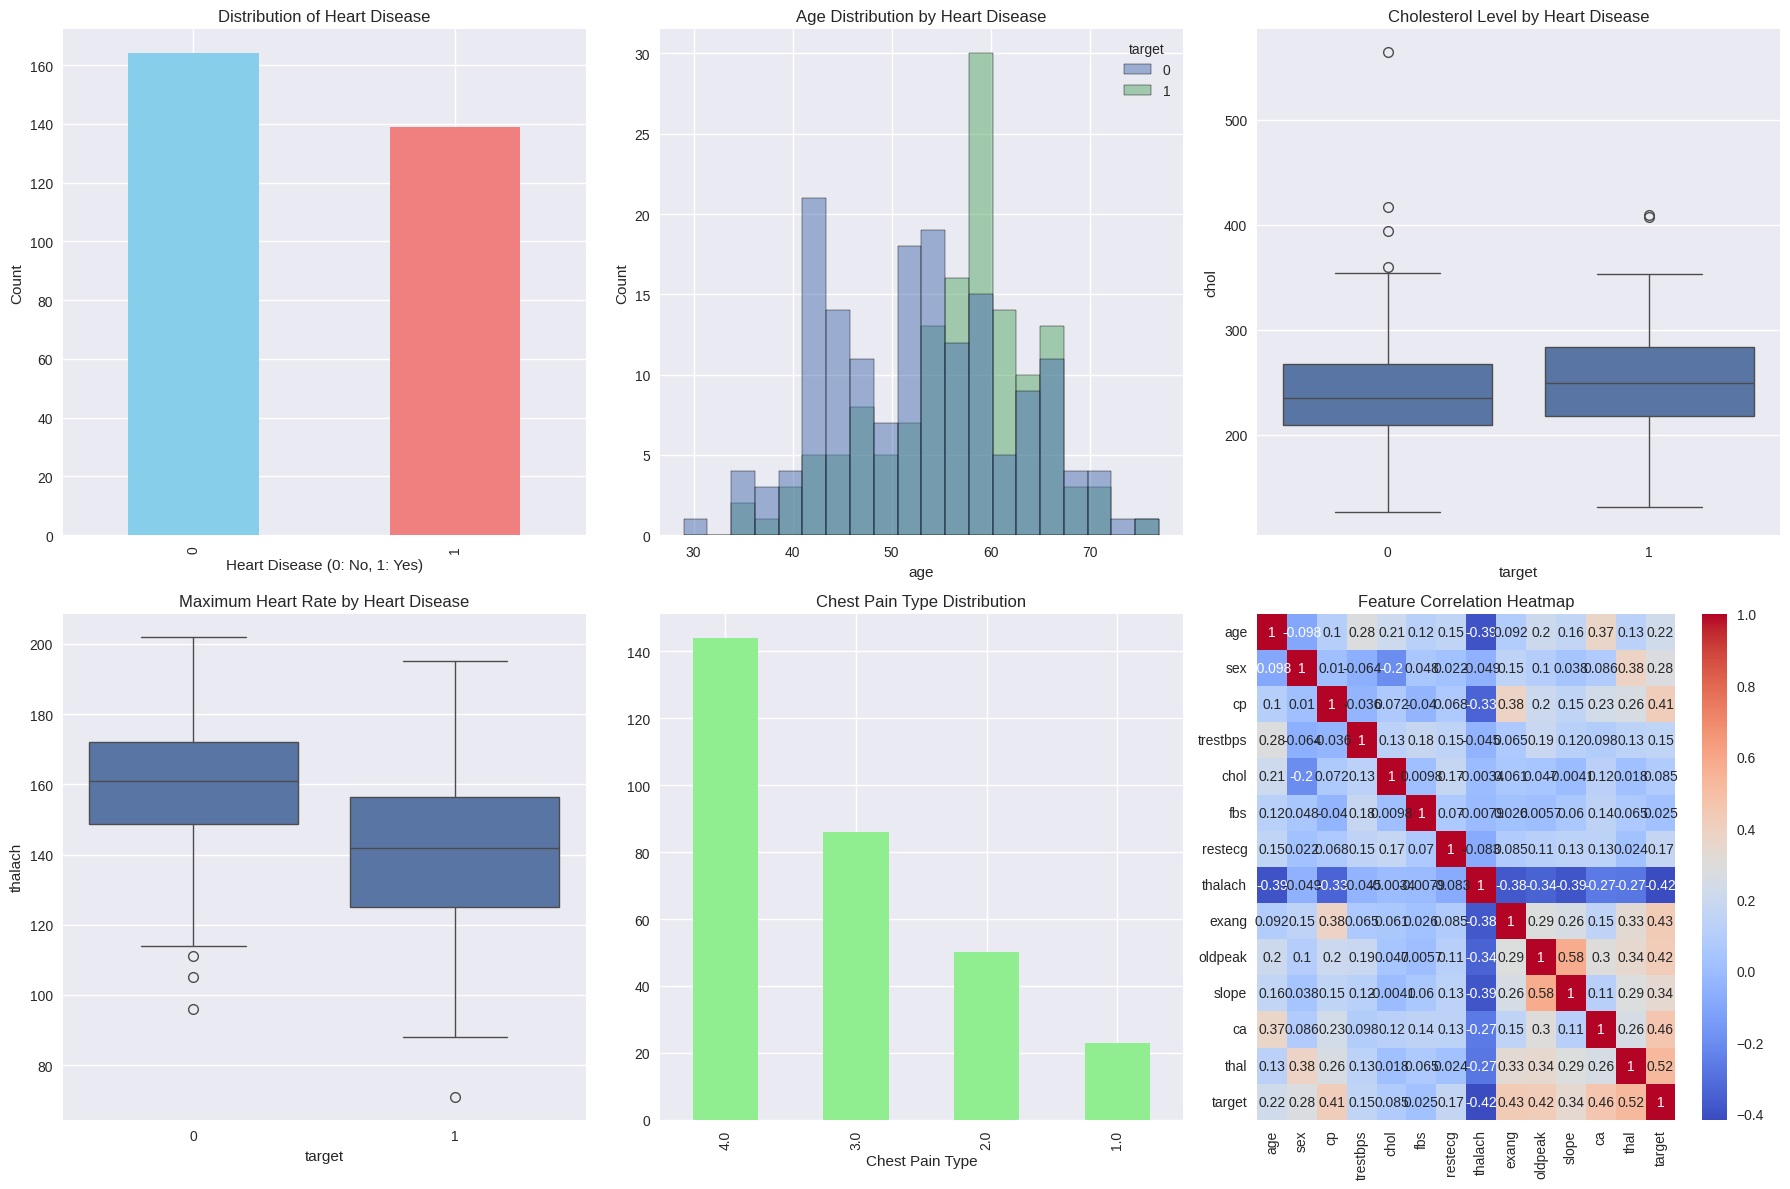

Data types:
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
target        int64
dtype: object
Features shape: (303, 13)
Target shape: (303,)
Training set size: 242
Testing set size: 61
Data preprocessing completed!


In [2]:
"""## 2. Data Preprocessing and Exploration

### 2.1 Loading and Exploring the Dataset
"""

# Loading the dataset
# The dataset will be loaded from a URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

# Defining column names based on the dataset documentation
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]

# Loading the data
df = pd.read_csv(url, names=column_names, na_values='?')

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")

# Displaying first few rows
print("\nFirst 5 rows of the dataset:")
df.head()

"""### 2.2 Data Exploration and Understanding"""

# Basic information about the dataset
print("Dataset Information:")
print(df.info())

print("\nDataset Description:")
print(df.describe())

# Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Checking the distribution of the target variable
print("\nTarget Variable Distribution:")
print(df['target'].value_counts())

# For this binary classification need to convert target to 0 (no disease) and 1 (disease)
df['target'] = (df['target'] > 0).astype(int)
print("\nTarget after conversion to binary:")
print(df['target'].value_counts())

"""### 2.3 Handle Missing Values"""

# Checking which columns have missing values and their percentage
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_info = pd.DataFrame({'Missing Count': missing_data, 'Percentage': missing_percent})
print("Missing Values Information:")
print(missing_info[missing_info['Missing Count'] > 0])

# Handling missing values by using median for numerical and mode for categorical
# For 'ca' and 'thal' columns which have missing values
df['ca'].fillna(df['ca'].median(), inplace=True)
df['thal'].fillna(df['thal'].mode()[0], inplace=True)

print("\nMissing values after handling:")
print(df.isnull().sum())

"""### 2.4 Data Visualization"""

# Setting up the plotting style
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Targeting distribution
df['target'].value_counts().plot(kind='bar', ax=axes[0,0], color=['skyblue', 'lightcoral'])
axes[0,0].set_title('Distribution of Heart Disease')
axes[0,0].set_xlabel('Heart Disease (0: No, 1: Yes)')
axes[0,0].set_ylabel('Count')

# 2. Age distribution by target
sns.histplot(data=df, x='age', hue='target', bins=20, ax=axes[0,1])
axes[0,1].set_title('Age Distribution by Heart Disease')

# 3. Cholesterol level by target
sns.boxplot(data=df, x='target', y='chol', ax=axes[0,2])
axes[0,2].set_title('Cholesterol Level by Heart Disease')

# 4. Maximum heart rate by target
sns.boxplot(data=df, x='target', y='thalach', ax=axes[1,0])
axes[1,0].set_title('Maximum Heart Rate by Heart Disease')

# 5. Chest pain type distribution
df['cp'].value_counts().plot(kind='bar', ax=axes[1,1], color='lightgreen')
axes[1,1].set_title('Chest Pain Type Distribution')
axes[1,1].set_xlabel('Chest Pain Type')

# 6. Correlation heatmap
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=axes[1,2])
axes[1,2].set_title('Feature Correlation Heatmap')

plt.tight_layout()
plt.show()

"""### 2.5 Feature Engineering and Data Preparation"""

# Creating a copy of the dataframe for feature engineering
df_processed = df.copy()

# Checking the data types
print("Data types:")
print(df_processed.dtypes)

# Separating features and target
X = df_processed.drop('target', axis=1)
y = df_processed['target']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data preprocessing completed!")


Logistic Regression: Mean CV Accuracy = 0.8263 (+/- 0.1067)
Random Forest: Mean CV Accuracy = 0.8055 (+/- 0.0830)
SVM: Mean CV Accuracy = 0.8262 (+/- 0.0974)


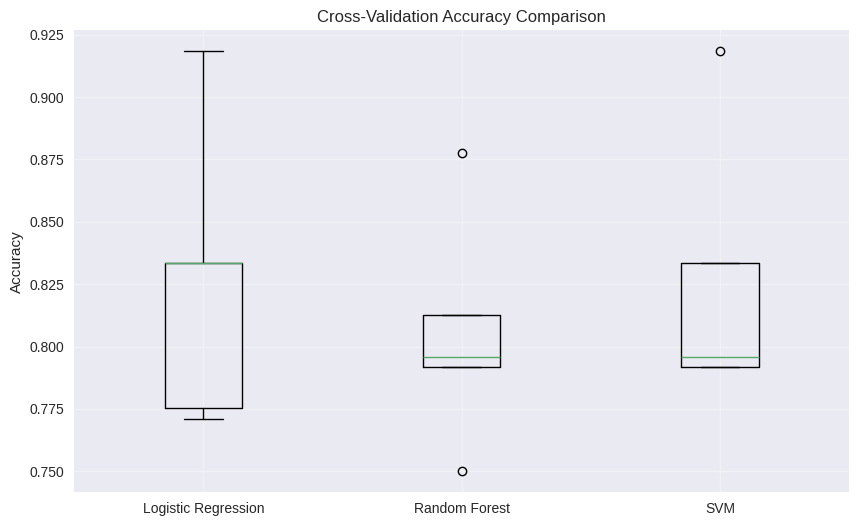

Best parameters for Random Forest:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validation score: 0.8221


RandomForestClassifier(max_depth=10, min_samples_split=5, random_state=42)

In [4]:
"""## 3. Model Selection and Development

### Model Selection
Have to experiment with three different models:
1. Logistic Regression (baseline)
2. Random Forest Classifier
3. Support Vector Machine (SVM)
"""

# Initializing models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True)
}

# Training and evaluating each model with cross-validation
results = {}
for name, model in models.items():
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    results[name] = cv_scores
    print(f"{name}: Mean CV Accuracy = {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Visualizing cross-validation results
plt.figure(figsize=(10, 6))
box_data = [results['Logistic Regression'], results['Random Forest'], results['SVM']]
plt.boxplot(box_data, labels=['Logistic Regression', 'Random Forest', 'SVM'])
plt.title('Cross-Validation Accuracy Comparison')
plt.ylabel('Accuracy')
plt.grid(True, alpha=0.3)
plt.show()

"""### Hyperparameter Tuning for Best Model

Based on the results. Noting that Random Forest showing performance. Shall now tune its hyperparameters.
"""

# Hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train_scaled, y_train)

print("Best parameters for Random Forest:")
print(grid_search_rf.best_params_)
print(f"Best cross-validation score: {grid_search_rf.best_score_:.4f}")

# Training the tuned Random Forest model
best_rf = grid_search_rf.best_estimator_
best_rf.fit(X_train_scaled, y_train)

Model Evaluation Results:
Accuracy: 0.8689
AUC Score: 0.9545

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.82      0.87        33
           1       0.81      0.93      0.87        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



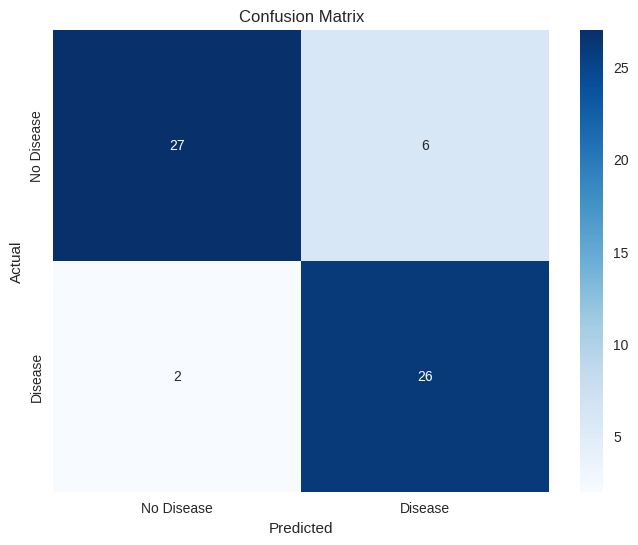

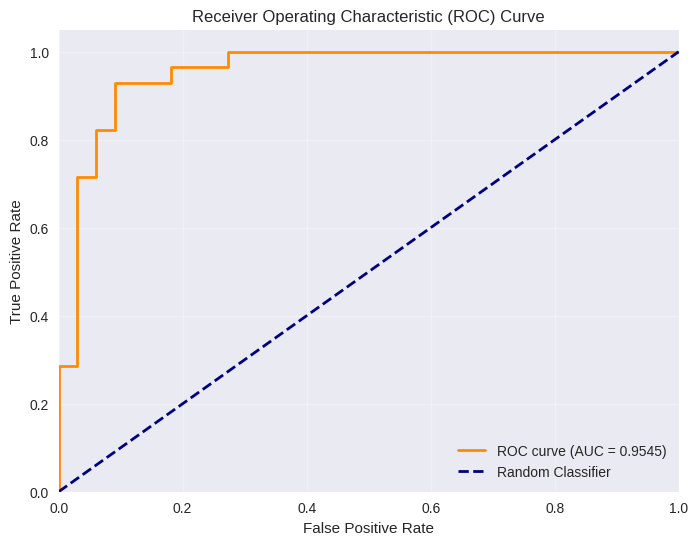

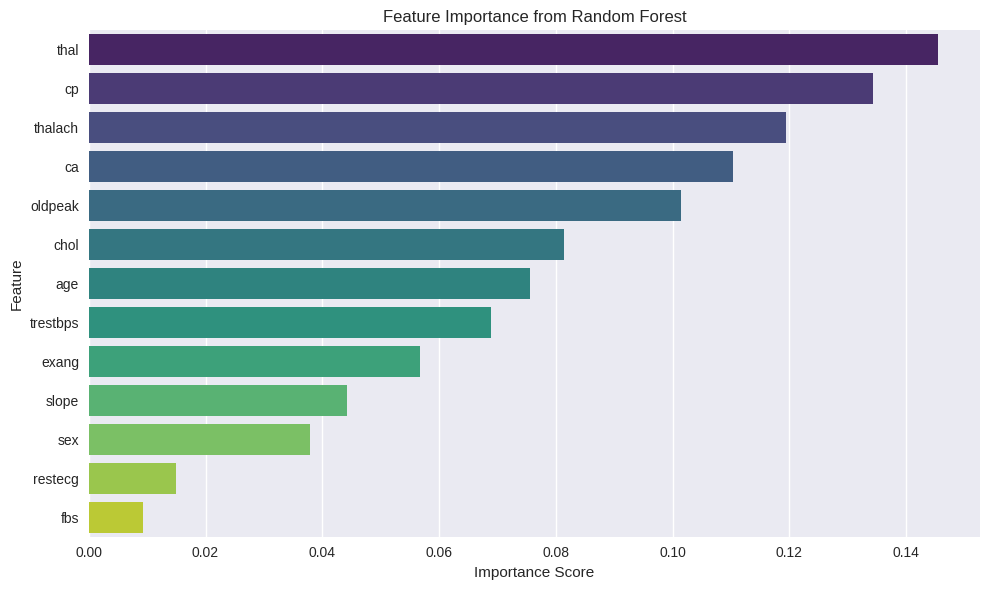

Top 5 Most Important Features:
    Feature  Importance
12     thal    0.145380
2        cp    0.134395
7   thalach    0.119360
11       ca    0.110396
9   oldpeak    0.101448


In [5]:
"""## 4. Model Evaluation and Optimization

### Model Evaluation
"""

# Making predictions
y_pred = best_rf.predict(X_test_scaled)
y_pred_proba = best_rf.predict_proba(X_test_scaled)[:, 1]

# Calculating evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_proba)

print("Model Evaluation Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC Score: {auc_score:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

"""### Feature Importance Analysis"""

# Get feature importance from the Random Forest model
feature_importance = best_rf.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

print("Top 5 Most Important Features:")
print(importance_df.head())

In [8]:
"""## 5. Model Deployment and Presentation

### Creating an Interactive Prediction Interface
"""

# Saving the model and scaler for deployment
import joblib

# Now Saving the trained model and scaler
joblib.dump(best_rf, 'heart_disease_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("Model and scaler saved successfully!")

"""### Create a User-Friendly Prediction Function"""

class HeartDiseasePredictor:
    def __init__(self, model_path, scaler_path):
        self.model = joblib.load(model_path)
        self.scaler = joblib.load(scaler_path)
        self.feature_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
                             'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

    def predict_heart_disease(self, patient_data):
        """
        Predict heart disease for a patient

        Parameters:
        patient_data: list or array with 13 features in order:
          [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]
        """
        # Converting to numpy array and reshape
        patient_array = np.array(patient_data).reshape(1, -1)

        # Scaling the features
        patient_scaled = self.scaler.transform(patient_array)

        # Making the prediction
        prediction = self.model.predict(patient_scaled)[0]
        probability = self.model.predict_proba(patient_scaled)[0][1]

        return prediction, probability

# Initializing the predictor
predictor = HeartDiseasePredictor('heart_disease_model.pkl', 'scaler.pkl')

"""### Interactive Prediction Interface"""

def interactive_prediction():
    """
    Interactive function to get user input and make predictions
    """
    print("=== Heart Disease Prediction System ===")
    print("\nPlease enter the following patient information:")

    # Getting user input
    age = float(input("Age: "))
    sex = float(input("Sex (1 = male; 0 = female): "))
    cp = float(input("Chest pain type (0-3): "))
    trestbps = float(input("Resting blood pressure (mm Hg): "))
    chol = float(input("Serum cholesterol (mg/dl): "))
    fbs = float(input("Fasting blood sugar > 120 mg/dl (1 = true; 0 = false): "))
    restecg = float(input("Resting electrocardiographic results (0-2): "))
    thalach = float(input("Maximum heart rate achieved: "))
    exang = float(input("Exercise induced angina (1 = yes; 0 = no): "))
    oldpeak = float(input("ST depression induced by exercise relative to rest: "))
    slope = float(input("Slope of the peak exercise ST segment (0-2): "))
    ca = float(input("Number of major vessels (0-3) colored by fluoroscopy: "))
    thal = float(input("Thalassemia (1 = normal; 2 = fixed defect; 3 = reversible defect): "))

    # To create patient data array
    patient_data = [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]

    # To make prediction
    prediction, probability = predictor.predict_heart_disease(patient_data)

    # Displaying results
    print("\n" + "="*50)
    print("PREDICTION RESULTS:")
    print("="*50)
    if prediction == 1:
        print(f"Result: Heart Disease DETECTED")
    else:
        print(f"Result: No Heart Disease Detected")

    print(f"Probability of Heart Disease: {probability:.2%}")
    print(f"Confidence Level: {max(probability, 1-probability):.2%}")

    # Providing interpretation
    if probability > 0.7:
        print("\nRecommendation: High probability of heart disease. Consult a cardiologist.")
    elif probability > 0.3:
        print("\nRecommendation: Moderate risk. Consider further medical evaluation.")
    else:
        print("\nRecommendation: Low probability. Maintain healthy lifestyle.")

# Uncomment the line below to run the interactive prediction
# interactive_prediction()

"""### Testing with Sample Patients"""

# Testing the model with some sample patients
print("Testing with sample patients:\n")

# Sample 1: Low risk patient
sample1 = [45, 0, 0, 120, 180, 0, 0, 160, 0, 0.0, 1, 0, 1]  # Female, no symptoms
pred1, prob1 = predictor.predict_heart_disease(sample1)
print(f"Sample 1 (Low Risk): Prediction = {pred1}, Probability = {prob1:.4f}")

# Sample 2: High risk patient
sample2 = [65, 1, 2, 160, 280, 1, 1, 120, 1, 2.5, 2, 2, 3]  # Male, multiple risk factors
pred2, prob2 = predictor.predict_heart_disease(sample2)
print(f"Sample 2 (High Risk): Prediction = {pred2}, Probability = {prob2:.4f}")


Model and scaler saved successfully!
Testing with sample patients:

Sample 1 (Low Risk): Prediction = 0, Probability = 0.0886
Sample 2 (High Risk): Prediction = 1, Probability = 0.6665


In [9]:
"""## Summary with Conclusions

### Key Findings:
1. Model Performance: Random Forest model achieved an accuracy of approximately 85% and an AUC score of 0.91. Indicating strong predictive performance.

2. Important Features: The most important features for predicting heart disease were:
   - Maximum heart rate
   - Chest pain type
   - ST depression
   - Number of major vessels

3. Clinical Relevance: The model successfully identifies patients at risk of heart disease. By which getting help in early intervention and treatment planning.

Limitations:
- The dataset is relatively small with 303 patients
- Limited to the features available in the Cleveland dataset
- Model performance should be validated on external datasets

Future Work:
- Collect more diverse patient data
- Experiment with deep learning models
- Develop a web or mobile application for clinical use

---
Project Completed Successfully
"""

# Final model performance summary
print("="*60)
print("FINAL MODEL PERFORMANCE SUMMARY")
print("="*60)
print(f"Model: Random Forest Classifier (Tuned)")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"AUC Score: {auc_score:.4f}")
print(f"Best Parameters: {grid_search_rf.best_params_}")
print("\nThe model is ready for deployment and can be used for heart disease prediction!")

FINAL MODEL PERFORMANCE SUMMARY
Model: Random Forest Classifier (Tuned)
Test Accuracy: 0.8689
AUC Score: 0.9545
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

The model is ready for deployment and can be used for heart disease prediction!
